## Data Quality Report (Morningstar Mutual Fund and ETF EDA)

In [1]:
##Let's the cell display across the whole browser window on wider displays
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 30)
#allow for the full df to be displayed in cell

In [4]:
df1 = pd.read_csv('Fund Data (1).csv')

In [5]:
df1.describe(include='all')
#Initial thoughts:
#--It is odd that RETURN_1M-->RETURN_3M are not displaying means and percentiles.
#--The RETURN_NET_1Y column has an extremely large max value so it displays in scientific notation
#--There are 4 instances of SHARECLASS_ID when this value is presumed to be a unique value

SHARECLASS_ID  \
count                             7062   
unique                            7059   
top     F0GBR04L7T                       
freq                                 4   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7062   
unique                                               7059   
top     BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
freq                                                    4   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7062          7062.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.709856   
std                                   NaN             1.485067   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7062                       7062   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        221   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7062                 7062                 7062   
unique                       83                    7                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 2794                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

       RETURN_NET_1M RETURN_NET_2M RETURN_NET_3M  RETURN_NET_6M  \
count           7062          7062          7062    7062.000000   
unique          1420          1931          1927            NaN   
top             2.28          4.41          4.63            NaN   
freq              42            28            21            NaN   
mean             NaN     

In [6]:
df1.dtypes
##We see here that those columns are of the wrong datatype (object) when they shold be numeric

SHARECLASS_ID                object
SHARECLASS_NAME              object
FUND_NAME                    object
SHARE_CLASS_COUNTER           int64
FUND_FAMILY_NAME             object
MSTAR_CATEGORY_NAME          object
MSTAR_GLOB_CATEGORY_NAME     object
MSTAR_BROAD_CATEGORY         object
COMMON_SOURCE_SYSTEM         object
RETURN_NET_1M                object
RETURN_NET_2M                object
RETURN_NET_3M                object
RETURN_NET_6M               float64
RETURN_NET_1Y               float64
RETURN_NET_2Y               float64
RETURN_NET_3Y               float64
RETURN_NET_4Y               float64
RETURN_NET_5Y               float64
dtype: object

In [7]:
#converting columns to numeric and coercing any missing values
cols = ['RETURN_NET_1M','RETURN_NET_2M','RETURN_NET_3M']
df1[cols]=df1[cols].apply(pd.to_numeric, errors='coerce')
df1.dtypes

SHARECLASS_ID                object
SHARECLASS_NAME              object
FUND_NAME                    object
SHARE_CLASS_COUNTER           int64
FUND_FAMILY_NAME             object
MSTAR_CATEGORY_NAME          object
MSTAR_GLOB_CATEGORY_NAME     object
MSTAR_BROAD_CATEGORY         object
COMMON_SOURCE_SYSTEM         object
RETURN_NET_1M               float64
RETURN_NET_2M               float64
RETURN_NET_3M               float64
RETURN_NET_6M               float64
RETURN_NET_1Y               float64
RETURN_NET_2Y               float64
RETURN_NET_3Y               float64
RETURN_NET_4Y               float64
RETURN_NET_5Y               float64
dtype: object

In [8]:
df1.replace('<null>', np.nan, inplace=True)
##Replacing any missing values with np.nan as it was observed in df2 there were '<null>' strings

## Addressing Missing Data

In [9]:
##Checking for any missing data:
missing1ratio = (df1.isnull().sum(axis=0) / len(df1)*100).sort_values(ascending=False)
print(missing1ratio)
##looks like a few missing values in the coerced columns, expressed as percentage missing


RETURN_NET_3M               0.212404
RETURN_NET_2M               0.212404
RETURN_NET_1M               0.212404
RETURN_NET_5Y               0.000000
MSTAR_GLOB_CATEGORY_NAME    0.000000
SHARECLASS_NAME             0.000000
FUND_NAME                   0.000000
SHARE_CLASS_COUNTER         0.000000
FUND_FAMILY_NAME            0.000000
MSTAR_CATEGORY_NAME         0.000000
COMMON_SOURCE_SYSTEM        0.000000
MSTAR_BROAD_CATEGORY        0.000000
RETURN_NET_4Y               0.000000
RETURN_NET_6M               0.000000
RETURN_NET_1Y               0.000000
RETURN_NET_2Y               0.000000
RETURN_NET_3Y               0.000000
SHARECLASS_ID               0.000000
dtype: float64


In [11]:
df1[df1.RETURN_NET_1M.isnull()]
##Looks like missingness is in rows 4686-4688 and 4695--4713 and then 5123.
#No discernible pattern to the occurence of the missingness in terms of fund name after viewing
#checked df1[df1.FUND_NAME.str.contains("SPDR")]

SHARECLASS_ID  \
4685  FOUSA068X3                       
4686  FOUSA068X4                       
4688  FOUSA068X5                       
4695  FOUSA06VOC                       
4696  FOUSA06VOD                       
4698  FOUSA06VOE                       
4699  FOUSA06VOF                       
4700  FOUSA06VOH                       
4701  FOUSA06VOI                       
4702  FOUSA06VOJ                       
4704  FOUSA06VOK                       
4705  FOUSA06VOL                       
4706  FOUSA06VOM                       
4713  FOUSA0861F                       
5123  F00000LOZ5                       

                                        SHARECLASS_NAME  \
4685                       SPDR S&P Emerging Europe ETF   
4686                SPDR S&P Emerging Latin America ETF   
4688         SPDR S&P Emerging Middle East & Africa ETF   
4695  SPDR S&P International Consumer Discretionary ...   
4696  SPDR S&P International Consumer Staples Sector...   
4698           SPDR S&P International Energy Sector ETF   
4699        SPDR S&P International Financial Sector ETF   
4700      SPDR S&P International Health Care Sector ETF   
4701       SPDR S&P International Industrial Sector ETF   
4702        SPDR S&P International Materials Sector ETF   
4704       SPDR S&P International Technology Sector ETF   
4705  SPDR S&P International Telecommunications Sect...   
4706        SPDR S&P International Utilities Sector ETF   
4713                                SPDR S&P Russia ETF   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...   

                                              FUND_NAME  SHARE_CLASS_COUNTER  \
4685                         SPDRS&PEmerging Europe ETF                    1   
4686                  SPDRS&PEmerging Latin America ETF                    1   
4688           SPDRS&PEmerging Middle East & Africa ETF                    1   
4695  SPDRS&PInternational Consumer Discretionary Se...                    1   
4696   SPDRS&PInternational Consumer Staples Sector ETF                    1   
4698             SPDRS&PInternational Energy Sector ETF                    1   
4699          SPDRS&PInternational Financial Sector ETF                    1   
4700        SPDRS&PInternational Health Care Sector ETF                    1   
4701         SPDRS&PInternational Industrial Sector ETF                    1   
4702          SPDRS&PInternational Materials Sector ETF                    1   
4704         SPDRS&PInternational Technology Sector ETF                    1   
4705  SPDRS&PInternational Telecommunications Sector...                    1   
4706          SPDRS&PInternational Utilities Sector ETF                    1   
4713                                  SPDRS&PRussia ETF                    1   
5123  Swisscanto (CH) Index Fund V - Swisscanto (CH)...                    1   

          FUND_FAMILY_NAME   MSTAR_CATEGORY_NAME  \
4685  SPDR State Street Gl  Miscellaneous Region   
4686  SPDR State Street Gl   Latin America Stock   
4688  SPDR State Street Gl  Miscellaneous Region   
4695  SPDR State Street Gl     Consumer Cyclical   
4696  SPDR State Street Gl    Consumer Defensive   
4698  SPDR State Street Gl         Equity Energy   
4699  SPDR State Street Gl             Financial   
4700  SPDR State Street Gl                Health   
4701  SPDR State Street Gl           Industrials   
4702  SPDR State Street Gl     Natural Resources   
4704  SPDR State Street Gl            Technology   
4705  SPDR State Street Gl        Communications   
4706  SPDR State Street Gl             Utilities   
4713  SPDR State Street Gl  Miscellaneous Region   
5123  Swisscanto Fondsleit           Global Bond   

                     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY  \
4685                             Other Equity               Equity   
4686                     Latin America Equity               Equity   
4688                             Other Equity               Equity   
4695  Consumer Goods & Services Sector Equi

## Addressing Outliers

SHARECLASS_ID SHARECLASS_NAME  \
394  F0GBR06SU1                         Avanza Zero   

                               FUND_NAME  SHARE_CLASS_COUNTER  \
394  Avanza Zero- Den avgiftsfria fonden                    1   

         FUND_FAMILY_NAME MSTAR_CATEGORY_NAME MSTAR_GLOB_CATEGORY_NAME  \
394  Avanza Fonder              Sweden Equity      Other Europe Equity   

    MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  RETURN_NET_2M  \
394               Equity               EUROPE           2.27           8.31   

     RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  \
394           8.24           3.49    100000000.0           9.67   

     RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  
394            9.7          10.82          13.86

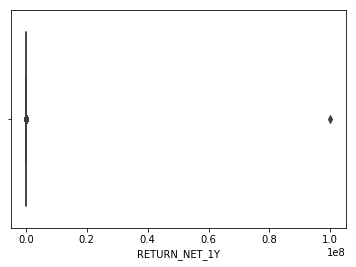

In [20]:
display(df1[df1.RETURN_NET_1Y==max(df1.RETURN_NET_1Y)])
##The max RETURN_NET_1Y value is clearly too high at 100000000.0

numcols = list(df1.select_dtypes(['float64','int64']).columns)
sns.boxplot(df1[numcols[5]])
##Investigated the rest of the numeric columns, finding that RETURN_NET_1M is the only one needing correcting

In [21]:
##Replacing the value with 10, assuming extra zeroes were mistakenly appended
df1.iloc[394, df1.columns.get_loc('RETURN_NET_1Y')]=10

SHARECLASS_ID                          SHARECLASS_NAME  \
1037  F00000PQUZ                      Commerzbank ETN -2x VSTOXXF Daily Short   

                                    FUND_NAME  SHARE_CLASS_COUNTER  \
1037  Commerzbank ETN -2x VSTOXXF Daily Short                    1   

          FUND_FAMILY_NAME                MSTAR_CATEGORY_NAME  \
1037  Commerzbank AG, Fran  Trading - Leveraged/Inverse Other   

     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
1037            Trading Tools          Alternative               FE_ALL   

      RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
1037          34.04         133.98          58.14         203.93   

      RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  \
1037        1700.06          30.02         -51.98          -49.5   

      RETURN_NET_5Y  
1037         -25.05

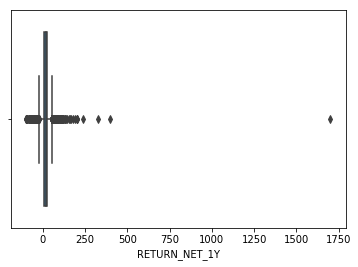

In [23]:
sns.boxplot(df1['RETURN_NET_1Y'])
df1[df1.RETURN_NET_1Y==max(df1.RETURN_NET_1Y)]

#Looks as though there is one more incorrect value, 
#but this could actually be feasible given the nature of the shareclass/category (Commerzbank ETN -2x VSTOXXF Daily Short)

#df1.iloc[1037, df1.columns.get_loc('RETURN_NET_1Y')]=170 in case we want to replace it with 170 under the same assumption


## Removing Duplicates

In [27]:
df1[df1.SHARECLASS_ID.str.contains("F0GBR04L7T")]
##We also observed there are 4 instances of a duplicate shareclass id
##The SHARECLASS_NAME happens to contain BNY

SHARECLASS_ID  \
476  F0GBR04L7T                       
477  F0GBR04L7T                       
478  F0GBR04L7T                       
479  F0GBR04L7T                       

                                       SHARECLASS_NAME  \
476  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...   

                                             FUND_NAME  SHARE_CLASS_COUNTER  \
476  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
477  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
478  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   
479  BNY Mellon Global Funds PLC - BNY Mellon S&P 5...                    1   

         FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
476  BNY Mellon Global Ma  US Large-Cap Blend Equity   
477  BNY Mellon Global Ma  US Large-Cap Blend Equity   
478  BNY Mellon Global Ma  US Large-Cap Blend Equity   
479  BNY Mellon Global Ma  US Large-Cap Blend Equity   

      MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
476  US Equity Large Cap Blend               Equity               EUROPE   
477  US Equity Large Cap Blend               Equity               EUROPE   
478  US Equity Large Cap Blend               Equity               EUROPE   
479  US Equity Large Cap Blend               Equity               EUROPE   

     RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
476           3.73            6.5           6.01           1.16   
477           3.73            6.5           6.01           1.16   
478           3.73            6.5           6.01           1.16   
479           3.73            6.5           6.01           1.16   

     RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  RETURN_NET_5Y  
476          14.56           8.48          11.44          14.65          15.55  
477          14.56           8.48          11.44          14.65          15.55  
478          14.56           8.48          11.44          14.65          15.55  
479          14.56           8.48          11.44          14.65          15.55

In [28]:
##Dropping duplicates
df1= df1.drop_duplicates()

In [30]:
df1.describe(include='all')

SHARECLASS_ID  \
count                             7059   
unique                            7059   
top     F00000NPZ6                       
freq                                 1   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7059   
unique                                               7059   
top     Pictet CH Institutional - Foreign Bonds Tracke...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7059          7059.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.710157   
std                                   NaN             1.485310   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7059                       7059   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        218   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7059                 7059                 7059   
unique                       83                    7                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 2791                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

        RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
count     7044.000000    7044.000000    7044.000000    7059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      

## Data set 2

In [40]:
df2 = pd.read_csv('Fund Data (2).csv')

In [41]:
df2.describe(include='all')

#Appears to contain 2 more rows than dataset 1
#None of the columns are Numeric
#Contains values recorded as the string '<null>' 


SHARECLASS_ID  \
count                             7061   
unique                            7061   
top     F00000NPZ6                       
freq                                 1   

                                          SHARECLASS_NAME  \
count                                                7061   
unique                                               7061   
top     Pictet CH Institutional - Foreign Bonds Tracke...   
freq                                                    1   

                                FUND_NAME CATEGORY SHARPE_RATIO_1Y  \
count                                7061     7061            7061   
unique                               4859        4            1029   
top     ANZ Vanguard Australian Shr Index   Equity            2.44   
freq                                   16     3087              35   

       SHARPE_RATIO_3Y SHARPE_RATIO_5Y BETA_1Y BETA_3Y BETA_5Y INFO_RATIO_3Y  \
count             7061            7061    7061    7061    7061          7061   
unique             403             457     658     543     521           674   
top               0.75            0.95       1  <null>  <null>        <null>   
freq               117              89     536    1288    1295          1288   

       INFO_RATIO_5Y  
count           7061  
unique          5656  
top           <null>  
freq            1295

In [42]:
df2.replace('<null>', np.nan, inplace=True)
print(df2.dtypes)
numcols2 = ['SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y','BETA_1Y','BETA_3Y','BETA_5Y','INFO_RATIO_3Y','INFO_RATIO_5Y' ]
df2[numcols2]=df2[numcols2].apply(pd.to_numeric, errors='coerce')
## Converts all numeric columns to float64

SHARECLASS_ID      object
SHARECLASS_NAME    object
FUND_NAME          object
CATEGORY           object
SHARPE_RATIO_1Y    object
SHARPE_RATIO_3Y    object
SHARPE_RATIO_5Y    object
BETA_1Y            object
BETA_3Y            object
BETA_5Y            object
INFO_RATIO_3Y      object
INFO_RATIO_5Y      object
dtype: object


In [43]:
df2.describe(include='all')

SHARECLASS_ID  \
count                             7061   
unique                            7061   
top     F00000NPZ6                       
freq                                 1   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                NaN   
50%                                NaN   
75%                                NaN   
max                                NaN   

                                          SHARECLASS_NAME  \
count                                                7061   
unique                                               7061   
top     Pictet CH Institutional - Foreign Bonds Tracke...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                FUND_NAME CATEGORY  SHARPE_RATIO_1Y  \
count                                7061     7061      7045.000000   
unique                               4859        4              NaN   
top     ANZ Vanguard Australian Shr Index   Equity              NaN   
freq                                   16     3087              NaN   
mean                                  NaN      NaN         1.920338   
std                                   NaN      NaN         2.408002   
min                                   NaN      NaN       -20.330000   
25%                                   NaN      NaN         0.620000   
50%                                   NaN      NaN         1.880000   
75%                                   NaN      NaN         2.990000   
max                                   NaN      NaN        47.470000   

        SHARPE_RATIO_3Y  SHARPE_RATIO_5Y      BETA_1Y      BETA_3Y  \
count       7046.000000      7046.000000  6910.000000  5773.000000   
unique              NaN              NaN          NaN          NaN   
top                 NaN              NaN          NaN          NaN   
freq                NaN              NaN          NaN          NaN   
mean           0.721029         0.884699     0.015236     0.957897   
std            1.614906         1.245530    43.532130     7.495397   
min           -4.540000        -4.830000 -1948.270000  -184.510000   
25%            0.410000         0.530000     0.720000     0.800000   
50%            0.680000         0.900000     0.970000     0.970000   
75%            0.890000         1.240000     1.060000     1.020000   
max           26.000000        21.860000  1188.090000   209.470000   

            BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
count   5766.000000    5773.000000    5766.000000  
unique          NaN            NaN            NaN  
top             NaN            NaN            NaN  
freq            NaN            NaN            NaN  
mean       0.946596      -0.632581      -0.607171  
std        3.835798       2.877199       2.681916  
min      -77.290000     -64.180000     -65.163350  
25%        0.800000      -0.680000      -0.676992  
50%        0.980000      -0.150000      -0.161340  
75%        1.020000       0.230000       0.225187  
max       89.500000       4.800000       3.927860

In [45]:
missing2ratio = (df2.isnull().sum(axis=0) / len(df2)*100).sort_values(ascending=False)
print(missing2ratio)
##There is significant missing data in INFO_RATIO and BETA for both 3Y and 5Y columns
#This could be due to the shares not being in existence long enough for the data to exist on a 3 year and 5 year timeframe since they seem to be missing together.

INFO_RATIO_5Y      18.340178
BETA_5Y            18.340178
INFO_RATIO_3Y      18.241042
BETA_3Y            18.241042
BETA_1Y             2.138507
SHARPE_RATIO_1Y     0.226597
SHARPE_RATIO_5Y     0.212434
SHARPE_RATIO_3Y     0.212434
CATEGORY            0.000000
FUND_NAME           0.000000
SHARECLASS_NAME     0.000000
SHARECLASS_ID       0.000000
dtype: float64


In [37]:
#No obvious pattern in missingness otherwise
#df2[pd.isnull(df2).any(axis=1)]
df2[pd.isnull(df2['BETA_1Y'])]

SHARECLASS_ID  \
25    F0AUS069U6                       
331   F000005OI2                       
378   F000005ETN                       
408   F00000OCHH                       
430   F00000IR61                       
434   F00000IR62                       
439   F000005FG9                       
488   F00000N1UJ                       
489   F00000MYPX                       
491   F00000MQ78                       
494   F00000J0JG                       
706   F00000NE34                       
707   F0CAN05P5L                       
860   F00000JZAQ                       
861   F00000JZAR                       
862   F00000JZAS                       
896   F00000JQAN                       
1016  F00000PU5D                       
1022  F00000PT94                       
1034  F00000PT9B                       
1045  F00000PT9A                       
1054  F00000PT99                       
1058  F00000PEZ0                       
1060  F00000PEYY                       
1065  F00000PU59                       
1069  F00000PU52                       
1076  F00000PU58                       
1079  F00000PU50                       
1086  F00000PU57                       
1090  F00000PU4Z                       
...                              ...   
5122  F00000LOZ5                       
5156  F00000MW1J                       
5157  F00000MW1I                       
5162  F00000LOTJ                       
5266  F00000O17D                       
5267  F00000O17C                       
5483  F00000MEZ0                       
5484  F00000LXXH                       
5485  F00000MEYZ                       
5486  F00000LXXI                       
5569  F00000MYN9                       
5646  F00000MF69                       
5739  F0AUS05K31                       
6155  F000001VWX                       
6223  F00000N7DW                       
6371  F000002GWE                       
6384  F00000JTZA                       
6398  F00000MJNE                       
6399  F00000MJND                       
6599  FOUSA07XT7                       
6600  FOUSA07XT8                       
6616  F00000H23Z                       
6619  F000002GWD                       
6645  F00000MCO4                       
6919  FOUSA06AZ4                       
6987  F000005PNJ                       
6988  F000005NUH                       
6989  F000005NUI                       
6991  F000005PNI                       
7057  F00000P8DC                       

                                        SHARECLASS_NAME  \
25           AIF Investments' New Zealand Property Fund   
331   Amundi ETF Short Govt Bond EuroMTS Broad Inves...   
378                             Ashburton Inflation ETF   
408   BB AES CARBONO SUSTENTABILIDADE FUNDO DE INVES...   
430    BMO Emerging Market Bond Hedged to CAD Index ETF   
434                    BMO Equal Weight REITs Index ETF   
439   BMO High Yield US Corporate Bond Hedged to CAD...   
488    BRADESCO FUNDO DE INVESTIMENTO EM PIBBS II - AES   
489   BRADSEG GIF IV FUNDO DE INVESTIMENTO MULTIMERC...   
491   BRASIL PLURAL FUNDO DE INVESTIMENTO EM COTAS D...   
494                                           BRTRAC 10   
706                CIBC GLOBAL BOND INDEX Premium Class   
707                              CIBC Global Bond Index   
860   ComStage Commerzbank Bund-Future Double Short ...   
861   ComStage Commerzbank Bund-Future Leveraged UCI...   
862    ComStage Commerzbank Bund-Future Short UCITS ETF   
896                  ComStage PSI 20 Leverage UCITS ETF   
1016               Commerzbank ETN -1x DAXF Daily Short   
1022              Commerzbank ETN -1x SX5EF Daily Short   
1034            Commerzbank ETN -2x TECDAXF Daily Short   
1045            Commerzbank ETN -3x TECDAXF Daily Short   
1054            Commerzbank ETN -4x TECDAXF Daily Short   
1058             Commerzbank ETN 10x SCHATZF Daily Long   
1060             Commerzbank ETN 15x SCHATZF Daily Long   
1065                Commerzbank ETN 1x MDAXF Daily Long   
1069    

In [50]:
#Dropping any duplicates
df2=df2.drop_duplicates()

In [52]:
df3 = pd.merge(df1, df2, how='right', left_on='SHARECLASS_ID', right_on='SHARECLASS_ID')
df3[df3.SHARECLASS_NAME_x.isnull()]
#For exploratory purposes, the two shareclasses that are present in df2 but not in df3 j(hence the right join)
#Aegon International Emerging Markets Equity .... will be dropping these due to lack of information
#F000005PCP, F000005PCQ	

SHARECLASS_ID SHARECLASS_NAME_x FUND_NAME_x  \
7059  F000005PCP                                   NaN         NaN   
7060  F000005PCQ                                   NaN         NaN   

      SHARE_CLASS_COUNTER FUND_FAMILY_NAME MSTAR_CATEGORY_NAME  \
7059                  NaN              NaN                 NaN   
7060                  NaN              NaN                 NaN   

     MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
7059                      NaN                  NaN                  NaN   
7060                      NaN                  NaN                  NaN   

      RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
7059            NaN            NaN            NaN            NaN   
7060            NaN            NaN            NaN            NaN   

      RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  RETURN_NET_4Y  \
7059            NaN            NaN            NaN            NaN   
7060            NaN            NaN            NaN            NaN   

      RETURN_NET_5Y                                  SHARECLASS_NAME_y  \
7059            NaN  Aegon International Emerging Markets Equity Tr...   
7060            NaN  Aegon International Emerging Markets Equity Tr...   

                                            FUND_NAME_y CATEGORY  \
7059  AEGON International Emerging Markets Equity Tr...   Equity   
7060  AEGON International Emerging Markets Equity Tr...   Equity   

      SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  \
7059             0.86             0.64             0.51     1.16     0.84   
7060             0.91             0.67             0.54     1.14     0.81   

      BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  
7059     0.87           0.41        0.28370  
7060     0.85           0.44        0.32374

In [31]:
df3 = pd.merge(df1, df2, how='inner', left_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'], right_on=['SHARECLASS_ID','SHARECLASS_NAME','FUND_NAME'])

In [32]:
len(df3.columns)

27

In [33]:
df3.describe(include='all')

SHARECLASS_ID                       SHARECLASS_NAME  \
count                             7059                                  7059   
unique                            7059                                  7059   
top     FOUSA02VQX                      NEXT FUNDS TOPIX-17 Energy Resources   
freq                                 1                                     1   
mean                               NaN                                   NaN   
std                                NaN                                   NaN   
min                                NaN                                   NaN   
25%                                NaN                                   NaN   
50%                                NaN                                   NaN   
75%                                NaN                                   NaN   
max                                NaN                                   NaN   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
count                                7059          7059.000000   
unique                               4858                  NaN   
top     ANZ Vanguard Australian Shr Index                  NaN   
freq                                   16                  NaN   
mean                                  NaN             1.710157   
std                                   NaN             1.485310   
min                                   NaN             1.000000   
25%                                   NaN             1.000000   
50%                                   NaN             1.000000   
75%                                   NaN             2.000000   
max                                   NaN            16.000000   

            FUND_FAMILY_NAME        MSTAR_CATEGORY_NAME  \
count                   7059                       7059   
unique                   505                        440   
top     iShares               US Large-Cap Blend Equity   
freq                     343                        218   
mean                     NaN                        NaN   
std                      NaN                        NaN   
min                      NaN                        NaN   
25%                      NaN                        NaN   
50%                      NaN                        NaN   
75%                      NaN                        NaN   
max                      NaN                        NaN   

       MSTAR_GLOB_CATEGORY_NAME MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  \
count                      7059                 7059                 7059   
unique                       83                    7                   11   
top               Trading Tools               Equity               FE_ALL   
freq                        694                 2791                 2775   
mean                        NaN                  NaN                  NaN   
std                         NaN                  NaN                  NaN   
min                         NaN                  NaN                  NaN   
25%                         NaN                  NaN                  NaN   
50%                         NaN                  NaN                  NaN   
75%                         NaN                  NaN                  NaN   
max                         NaN                  NaN                  NaN   

        RETURN_NET_1M  RETURN_NET_2M  RETURN_NET_3M  RETURN_NET_6M  \
count     7044.000000    7044.000000    7044.000000    7059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         2.062219       3.474475       3.762835       6.095098   
std          3.910265       6.747818       6.460851      10.918910   
min        -52.450000     -63.640000     -75.500000     -95.530000   
25%          0.480000       0.590000       1.280000       1.550000   
50%    

In [34]:
Beta_ = df3[['CATEGORY','BETA_1Y','BETA_3Y','BETA_5Y']].groupby('CATEGORY').mean().reset_index()
Beta_

CATEGORY   BETA_1Y   BETA_3Y   BETA_5Y
0    Allocation  1.550077  1.396394  1.334814
1   Alternative  1.148068  1.100286  1.055019
2        Equity -0.976942  0.893372  0.899889
3  Fixed Income  0.405154  0.836647  0.831811

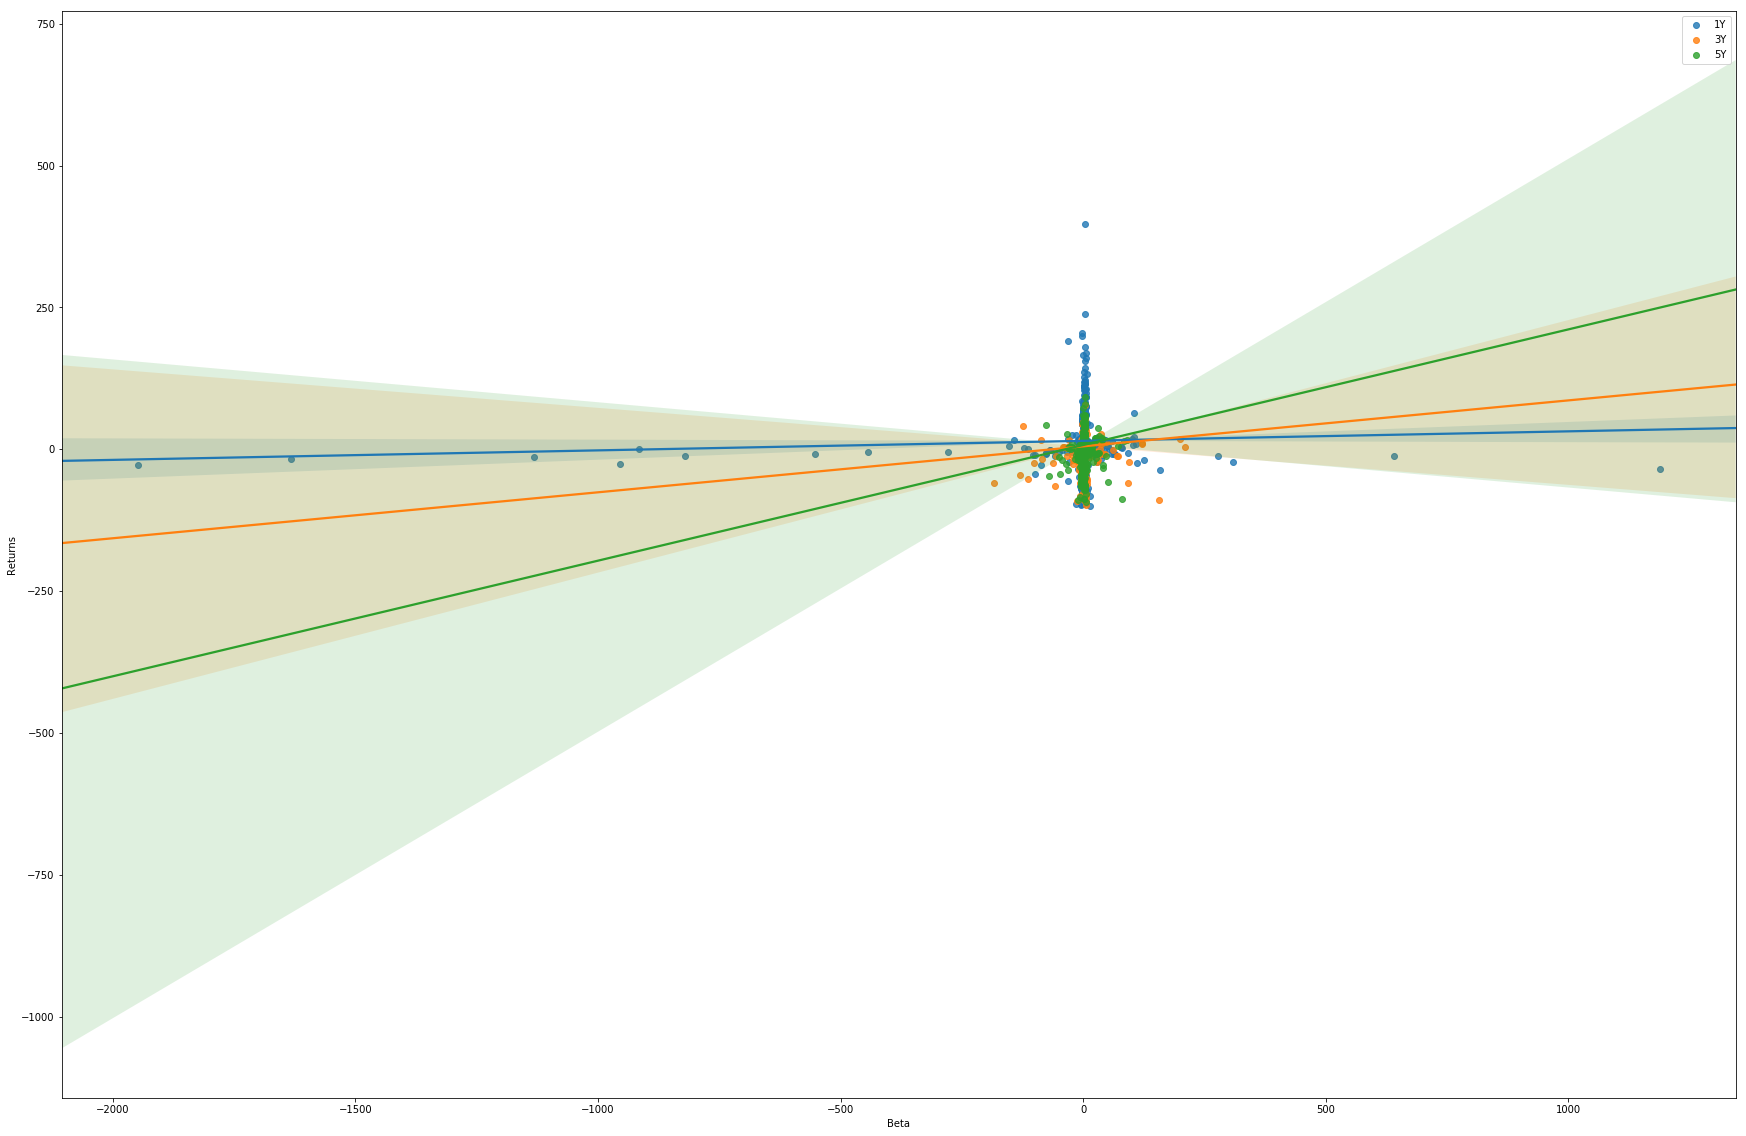

In [35]:

fig, axs = plt.subplots(figsize=(30,20))
sns.regplot(x='BETA_1Y', y='RETURN_NET_1Y', data=df3, ax=axs, label='1Y')
sns.regplot(x='BETA_3Y', y='RETURN_NET_3Y', data=df3, ax=axs, label='3Y')
sns.regplot(x='BETA_5Y',y='RETURN_NET_5Y', data=df3, ax=axs, label = '5Y')
axs.set(xlabel='Beta', ylabel='Returns')
axs.legend()

#  Beta is a measure of the degree of change in value one can expect in a portfolio
# given a change in value in a benchmark index. A portfolio with a beta greater
# than one is generally more volatile than its benchmark index, and a portfolio
# with a beta of less than one is generally less volatile than its benchmark index

##Overall we see 1yr having greater variability in both Beta and Returns

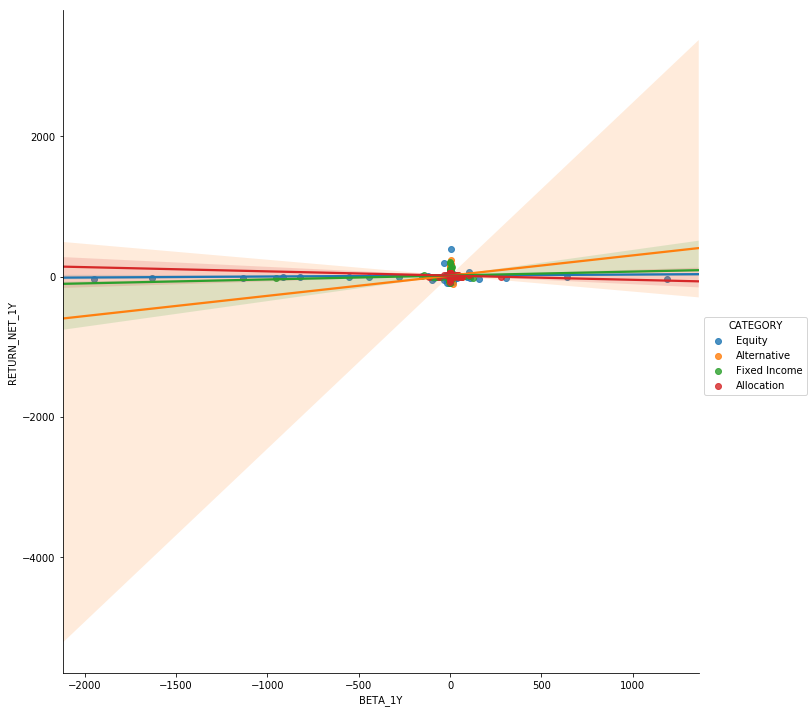

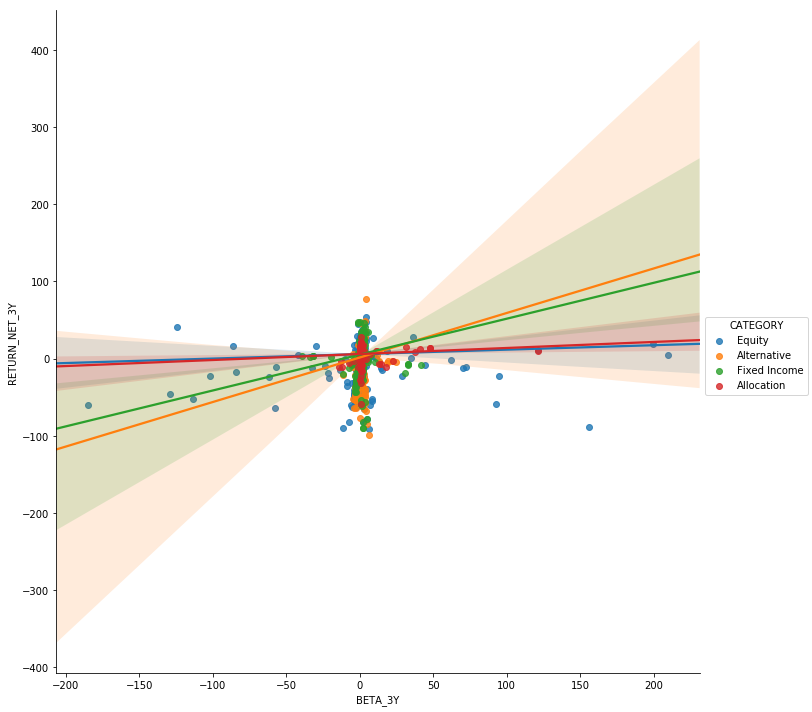

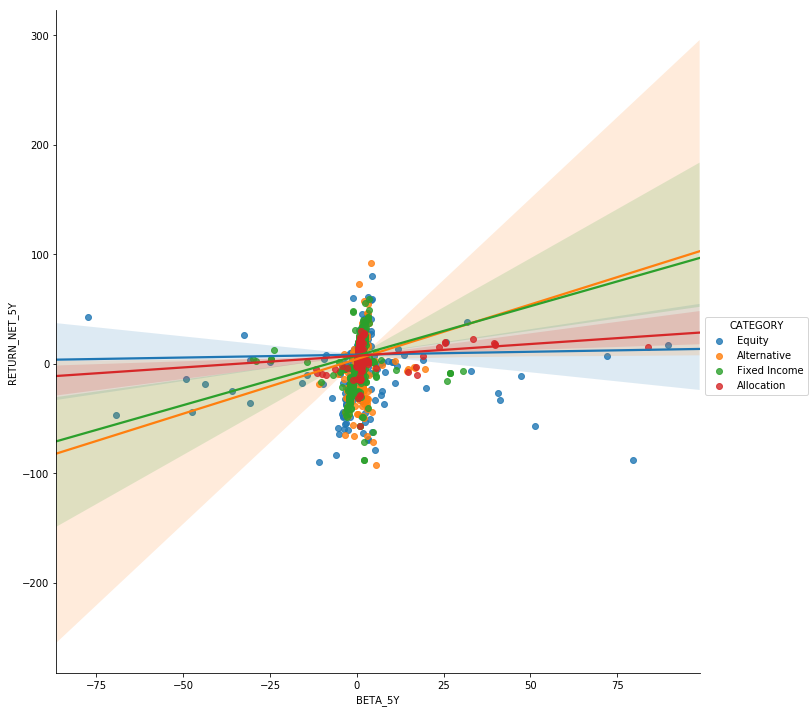

In [36]:
Beta_ = df3[['CATEGORY','BETA_1Y','BETA_3Y','BETA_5Y','RETURN_NET_1Y','RETURN_NET_3Y','RETURN_NET_5Y']]

sns.lmplot(x='BETA_1Y', y='RETURN_NET_1Y', hue='CATEGORY' ,data=df3, size=10)
sns.lmplot(x='BETA_3Y', y='RETURN_NET_3Y', hue='CATEGORY', data=df3, size=10)
sns.lmplot(x='BETA_5Y', y='RETURN_NET_5Y', hue='CATEGORY', data=df3, size=10)


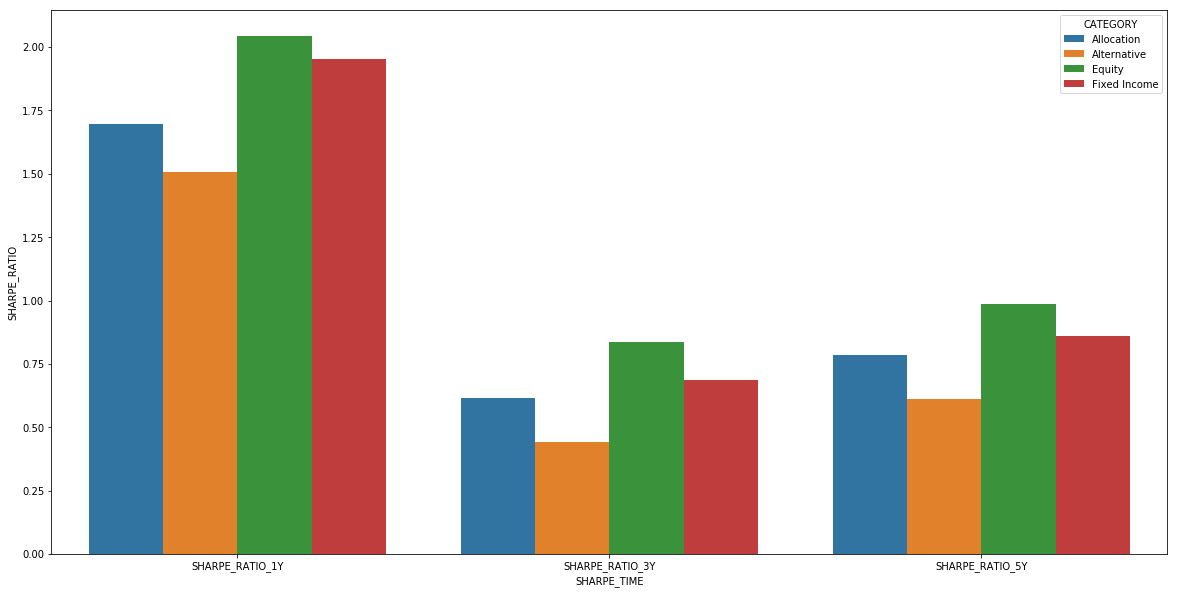

In [37]:
Sharpe_ = df3[['CATEGORY','SHARPE_RATIO_1Y','SHARPE_RATIO_3Y','SHARPE_RATIO_5Y']].groupby('CATEGORY').mean().reset_index()
melted = pd.melt(Sharpe_, id_vars='CATEGORY' ,var_name='SHARPE_TIME', value_name = 'SHARPE_RATIO')
fig, axs = plt.subplots(figsize=(20,10))
sns.barplot(x='SHARPE_TIME', y='SHARPE_RATIO',hue = 'CATEGORY', data=melted)
##Yhe Sharpe ratio is the returns generated over the risk-free rate, per unit of risk. Risk in this case is taken to be the fund's standard deviation. 
##A higher Sharpe ratio is therefore better as it represents a higher return generated per unit of risk.
##Equity relative to the other categories appears to consistently have a higher Sharpe Ratio

In [38]:
Sharpe_

CATEGORY  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  SHARPE_RATIO_5Y
0    Allocation         1.697948         0.613661         0.784687
1   Alternative         1.509222         0.442253         0.612350
2        Equity         2.042869         0.837433         0.988243
3  Fixed Income         1.954977         0.684793         0.860666

In [39]:
df3['STDRETS'] = df3[['RETURN_NET_1Y','RETURN_NET_2Y','RETURN_NET_3Y','RETURN_NET_4Y','RETURN_NET_5Y']].std(axis=1)
df3['MEANRETS']= df3[['RETURN_NET_1Y','RETURN_NET_2Y','RETURN_NET_3Y','RETURN_NET_4Y','RETURN_NET_5Y']].mean(axis=1)

#This is crude because it is generally accepted that you need >30 data points for a standard deviation to be meaningul at all.

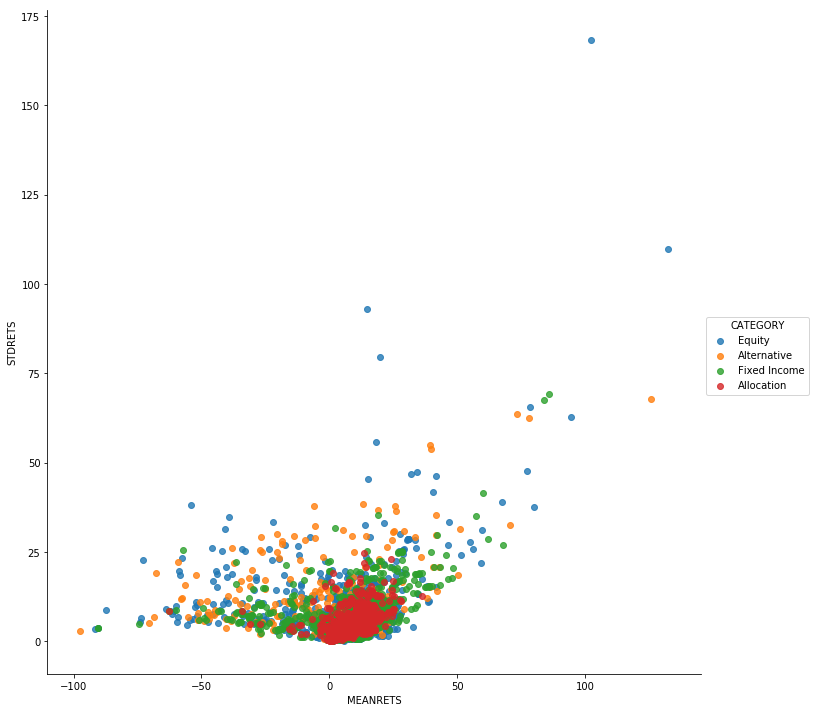

In [40]:
sns.lmplot(x='MEANRETS', y='STDRETS', hue='CATEGORY' , fit_reg=False, data=df3, size=10)


In [41]:
df3.head()

SHARECLASS_ID  \
0  FVUSA04ADJ                       
1  FVUSA001AQ                       
2  F00000M8U5                       
3  F00000N9TF                       
4  F0000000IA                       

                                   SHARECLASS_NAME  \
0  1290 VT Socially Responsible Portfolio Class IA   
1  1290 VT Socially Responsible Portfolio Class IB   
2                 ABC-CA CSI 300 Index Equity Fund   
3                 ABC-CA CSI 500 Index Equity Fund   
4                    ABF Hong Kong Bond Index Fund   

                                FUND_NAME  SHARE_CLASS_COUNTER  \
0  1290 VT Socially Responsible Portfolio                    1   
1  1290 VT Socially Responsible Portfolio                    2   
2        ABC-CA CSI 300 Index Equity Fund                    1   
3        ABC-CA CSI 500 Index Equity Fund                    1   
4           ABF Hong Kong Bond Index Fund                    1   

       FUND_FAMILY_NAME MSTAR_CATEGORY_NAME    MSTAR_GLOB_CATEGORY_NAME  \
0  AXA Equitable                Large Blend  US Equity Large Cap Growth   
1  AXA Equitable                Large Blend  US Equity Large Cap Growth   
2  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
3  ABC-CA Fund Mgmt Co.        Equity Funds        Greater China Equity   
4  HSBC Investment Fund            HKD Bond           Asia Fixed Income   

  MSTAR_BROAD_CATEGORY COMMON_SOURCE_SYSTEM  RETURN_NET_1M  RETURN_NET_2M  \
0               EQUITY               FO_USA           2.32           4.73   
1               EQUITY               FO_USA           2.36           4.73   
2               Equity         ASIA-PACIFIC           4.04           4.47   
3               Equity         ASIA-PACIFIC          -0.72           1.11   
4         Fixed Income               FE_ALL          -0.50          -1.27   

   RETURN_NET_3M  RETURN_NET_6M  RETURN_NET_1Y  RETURN_NET_2Y  RETURN_NET_3Y  \
0           4.49           8.61          22.82          11.81           9.80   
1           4.49           8.59          22.83          11.83           9.82   
2           6.89          17.54          21.14           8.27          17.99   
3           3.59           5.16           0.70          -3.88           7.83   
4          -0.90          -0.63          -1.34           0.47           1.12   

   RETURN_NET_4Y  RETURN_NET_5Y CATEGORY  SHARPE_RATIO_1Y  SHARPE_RATIO_3Y  \
0          11.49          14.95   Equity             4.92             0.89   
1          11.49          14.95   Equity             4.86             0.89   
2          15.28          13.59   Equity             1.82             0.71   
3          13.23          13.82   Equity             0.02             0.38   
4           1.20           0.54   Equity            -0.79             0.21   

   SHARPE_RATIO_5Y  BETA_1Y  BETA_3Y  BETA_5Y  INFO_RATIO_3Y  INFO_RATIO_5Y  \
0             1.43     0.85     0.97     0.97          -0.78       -0.40272   
1             1.43     0.86     0.97     0.97          -0.78       -0.40147   
2             0.61     1.16     1.01     1.04           0.79        0.72641   
3             0.59     0.87     0.88     0.94          -0.23        0.23188   
4             0.04     0.84     0.86      NaN          -1.99            NaN   

    STDRETS  MEANRETS  
0  5.178796    14.174  
1  5.176474    14.184  
2  4.839332    15.254  
3  7.776577     6.340  
4  1.025973     0.398

In [42]:
import sqlite3

In [43]:
connection = sqlite3.connect(':memory:')


In [44]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[]


In [45]:
##PLOT BETA AGAINST RETURN USING PLOTLY

In [46]:
##RUN VARIOUS ML ALGORITHMS

In [41]:
from sklearn import preprocessing
from sklearn import model_selection

In [42]:
y=df3.set_index(keys=['SHARECLASS_ID','SHARECLASS_NAME'])
y=df3['CATEGORY']


SHARECLASS_ID                   SHARECLASS_NAME                                
FVUSA04ADJ                      1290 VT Socially Responsible Portfolio Class IA    Equity
FVUSA001AQ                      1290 VT Socially Responsible Portfolio Class IB    Equity
F00000M8U5                      ABC-CA CSI 300 Index Equity Fund                   Equity
F00000N9TF                      ABC-CA CSI 500 Index Equity Fund                   Equity
F0000000IA                      ABF Hong Kong Bond Index Fund                      Equity
Name: CATEGORY, dtype: object

In [43]:

X=df3[df3.columns.difference(['CATEGORY','STDRETS','MEANRETS'])]
X.set_index(keys=['SHARECLASS_ID','SHARECLASS_NAME'], inplace=True)
X.replace(np.nan, -9999, inplace=True)

/Users/michaelchuang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
X['MSTAR_BROAD_CATEGORY'].count_values()

In [45]:
#X=preprocessing.Imputer(strategy='median', axis=0).fit_transform(X.select_dtypes(include=['float64']))

In [46]:

X.loc[:,list(X.select_dtypes(include=['float64']))] = preprocessing.RobustScaler().fit_transform(X.select_dtypes(include=['float64']))
#Scaling Numeric Variable


/Users/michaelchuang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
X.dtypes

BETA_1Y                     float64
BETA_3Y                     float64
BETA_5Y                     float64
COMMON_SOURCE_SYSTEM         object
FUND_FAMILY_NAME             object
FUND_NAME                    object
INFO_RATIO_3Y               float64
INFO_RATIO_5Y               float64
MSTAR_BROAD_CATEGORY         object
MSTAR_CATEGORY_NAME          object
MSTAR_GLOB_CATEGORY_NAME     object
RETURN_NET_1M               float64
RETURN_NET_1Y               float64
RETURN_NET_2M               float64
RETURN_NET_2Y               float64
RETURN_NET_3M               float64
RETURN_NET_3Y               float64
RETURN_NET_4Y               float64
RETURN_NET_5Y               float64
RETURN_NET_6M               float64
SHARE_CLASS_COUNTER           int64
SHARPE_RATIO_1Y             float64
SHARPE_RATIO_3Y             float64
SHARPE_RATIO_5Y             float64
dtype: object

In [48]:
dummies = list(X.select_dtypes(include=['object']))
dummies


['COMMON_SOURCE_SYSTEM',
 'FUND_FAMILY_NAME',
 'FUND_NAME',
 'MSTAR_BROAD_CATEGORY',
 'MSTAR_CATEGORY_NAME',
 'MSTAR_GLOB_CATEGORY_NAME']

In [49]:
X= pd.get_dummies(X, drop_first = True, columns = dummies)


In [50]:
for i in X.columns:
    print(i)

BETA_1Y
BETA_3Y
BETA_5Y
INFO_RATIO_3Y
INFO_RATIO_5Y
RETURN_NET_1M
RETURN_NET_1Y
RETURN_NET_2M
RETURN_NET_2Y
RETURN_NET_3M
RETURN_NET_3Y
RETURN_NET_4Y
RETURN_NET_5Y
RETURN_NET_6M
SHARE_CLASS_COUNTER
SHARPE_RATIO_1Y
SHARPE_RATIO_3Y
SHARPE_RATIO_5Y
COMMON_SOURCE_SYSTEM_ASIA-PACIFIC
COMMON_SOURCE_SYSTEM_AUS-NZL
COMMON_SOURCE_SYSTEM_CAN
COMMON_SOURCE_SYSTEM_CARIBBEAN
COMMON_SOURCE_SYSTEM_EUROPE
COMMON_SOURCE_SYSTEM_FE_ALL
COMMON_SOURCE_SYSTEM_FO_USA
COMMON_SOURCE_SYSTEM_GBR
COMMON_SOURCE_SYSTEM_LATIN-AMERICA
COMMON_SOURCE_SYSTEM_MIDDLE-EAST
FUND_FAMILY_NAME_ABSA Capital ETF    
FUND_FAMILY_NAME_ACTIAM N.V.         
FUND_FAMILY_NAME_AEGON Ireland       
FUND_FAMILY_NAME_AG Insurance (Broker
FUND_FAMILY_NAME_AGF Security S.A.   
FUND_FAMILY_NAME_ALPS                
FUND_FAMILY_NAME_AMIDEX              
FUND_FAMILY_NAME_AMP Group           
FUND_FAMILY_NAME_AXA Equitable       
FUND_FAMILY_NAME_AXA Investment Manag
FUND_FAMILY_NAME_AXA Rosenberg Manage
FUND_FAMILY_NAME_AXA SPDB Investment 
FU

FUND_NAME_Harvest SZSE Fundamental 120ETF Feeder Fund
FUND_NAME_Harvest SZSE SME-CHINEXT 300 ETF
FUND_NAME_Harvest SZSE SME-CHINEXT 400 ETF
FUND_NAME_Harvest SZSE SME-CHINEXT 400 Feeder
FUND_NAME_Health Care Select Sector SPDRFund
FUND_NAME_Hedged Index Global Infrastructure Securities Fund
FUND_NAME_Hedged Index Global Real Estate Securities Fund
FUND_NAME_Henderson Institutional UK Equity Tracker Trust
FUND_NAME_Henderson UK Index Fund
FUND_NAME_Henderson UK Tracker Fund
FUND_NAME_Hennessy Gas Utility Fund
FUND_NAME_Hi Together Index Feeder Equity-Derivatives 1
FUND_NAME_Hitachi Balance Fund Equity 30
FUND_NAME_Hitachi Balance Fund Equity 50
FUND_NAME_Hitachi Balance Fund Equity 70
FUND_NAME_Hitachi Domestic Bond Index Fund
FUND_NAME_Hitachi Domestic Equity Index Fund
FUND_NAME_Hitachi Foreign Bond Index Fund
FUND_NAME_Hitachi Foreign Equity Index Fund
FUND_NAME_Homestead Stock Index Fund
FUND_NAME_Horizon - Access Fund Brazil
FUND_NAME_Horizon - Access Fund CSOB Cesky Akciovy (PX)
F

FUND_NAME_TD European Index Fund
FUND_NAME_TD International Index Currency Neutral Fund
FUND_NAME_TD International Index Fund
FUND_NAME_TD Managed Index Aggressive Growth Portfolio
FUND_NAME_TD Managed Index Balanced Growth Portfolio
FUND_NAME_TD Managed Index Income & Moderate Growth Portfolio
FUND_NAME_TD Managed Index Income Portfolio
FUND_NAME_TD Managed Index Maximum Equity Growth Portfolio
FUND_NAME_TD Nasdaq Index Fund
FUND_NAME_TD U.S. Index Currency Neutral Fund
FUND_NAME_TD U.S. Index Fund
FUND_NAME_TIAA-CREF Bond Index Fund
FUND_NAME_TIAA-CREF Emerging Markets Equity Index Fund
FUND_NAME_TIAA-CREF Equity Index Fund
FUND_NAME_TIAA-CREF International Equity Index Fund
FUND_NAME_TIAA-CREF Large-Cap Growth Index Fund
FUND_NAME_TIAA-CREF Large-Cap Value Index Fund
FUND_NAME_TIAA-CREF S&P 500 Index Fund
FUND_NAME_TIAA-CREF Small-Cap Blend Index Fund
FUND_NAME_TMA Jpn Stk Topix Fd
FUND_NAME_TMA LPS Asset Mix Fund Aggressive
FUND_NAME_TMA LPS Asset Mix Fund Balance
FUND_NAME_TMA LPS

In [51]:
X.shape

(7059, 5916)

In [52]:

skf = model_selection.StratifiedKFold(n_splits=3)
skf.get_n_splits(X,y )

3

In [53]:
skf

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [54]:
X.select_dtypes(include=['float64'])

BETA_1Y  \
SHARECLASS_ID                  SHARECLASS_NAME                                                    
FVUSA04ADJ                     1290 VT Socially Responsible Portfolio Class IA        -0.289474   
FVUSA001AQ                     1290 VT Socially Responsible Portfolio Class IB        -0.263158   
F00000M8U5                     ABC-CA CSI 300 Index Equity Fund                        0.526316   
F00000N9TF                     ABC-CA CSI 500 Index Equity Fund                       -0.236842   
F0000000IA                     ABF Hong Kong Bond Index Fund                          -0.315789   
F000000AFM                     ABF Malaysia Bond Index                                 0.157895   
F0000000I9                     ABF Pan Asia Bond Index                                 0.105263   
F0000026RB                     ABF Philippines Bond Index Fund                        -0.421053   
F0HKG070AD                     ABF Singapore Bond Index Fd                             0.236842   
F00000UJFD                     ACTIAM Responsible Index Fund Equity - Europe           0.105263   
F00000UJFG                     ACTIAM Responsible Index Fund Equity - North Am...      2.684211   
F00000UJFH                     ACTIAM Responsible Index Fund Equity - North Am...      2.710526   
F00000UJFI                     ACTIAM Responsible Index Fund Equity - North Am...      2.684211   
F00000UJFF                     ACTIAM Responsible Index Fund Equity - Pacific         -2.052632   
F00000IRZ9                     AEGON Duurzaam Index Aandelen Fonds                     0.078947   
F00000IRZ5                     AEGON Europa Index Aandelen Fonds                       0.131579   
F000005OVB                     Aegon International UK Index Tracker A                 -0.394737   
F000005OVW                     Aegon International UK Index Tracker B                 -0.394737   
F00000IRZ7                     AEGON Wereld Index Aandelen Fonds                       0.184211   
F00000MM7Z                     AGFiQ U.S. Market Neutral Anti-Beta Fund              100.842105   
F00000MM83                     AGFiQ U.S. Market Neutral Momentum Fund               209.868421   
F00000MBNY                     AGFiQ U.S. Market Neutral Size Fund                   -91.921053   
F00000MM82                     AGFiQ U.S. Market Neutral Value Fund                 -117.815789   
F0AUS069U6                     AIF Investments' New Zealand Property Fund         -26315.684211   
F000002T7I                     AKB Institutional Funds - AKB Aktien Schweiz To...      0.157895   
F00000MZJX                     ALOCC AES FUNDO DE INVESTIMENTO EM COTAS DE FUN...     -0.684211   
F00000MZJZ                     ALOCC RESERVA FUNDO DE INVESTIMENTO EM COTAS DE...     -0.210526   
F000000RDF                     ALPHA ETF FTSE Athex Large Cap Equity UCITS             0.184211   
F000002N19                     ALPS Equal Sector Weight ETF                           -0.052632   
F00000OBQA                     ALPS Sector Dividend Dogs ETF                          -0.026316   
...                                                                                         ...   
F00000MVS1                     iShares US Dividend Growers Index ETF (CAD-Hedg...     -1.789474   
F00000OJM9                     iShares US Equity Index Fund (UK) A Acc                -0.342105   
F00000OJMA                     iShares US Equity Index Fund (UK) D Acc                -0.368421   
F00000OJMB                     iShares US Equity Index Fund (UK) X Acc                -0.342105   
F00000OQA8                     iShares US Equity Index Fund (UK) X Inc                -0.342105   
F000002Q28                     iShares US Fundamental Index ETF Advisor Class          0.184211   
F000002Q27                     iShares US Fundamental Index ETF Common Class           0.184211   
F0000000HZ                     iShares US Fundamental Index ETF (CAD-Hedged) A...     -1.684211   
F0000000HY                   

In [171]:
X.shape

(7059, 5916)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [169]:
skf.split(X, y)

<generator object _BaseKFold.split at 0x1a1c52d1a8>

In [56]:

skf = model_selection.StratifiedKFold(n_splits=3)
skf.get_n_splits(X,y )
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1029 1030 1031 ... 7056 7057 7058] TEST: [   0    1    2 ... 6439 6440 6441]


KeyError: '[1029 1030 1031 ... 7056 7057 7058] not in index'

In [57]:
from sklearn import linear_model
from sklearn import ensemble
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


/Users/michaelchuang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [58]:
logistic = linear_model.LogisticRegressionCV(Cs=1, class_weight='balanced',
                                                 scoring='accuracy',
                                                 n_jobs=-1,
                                                 max_iter=1, verbose=1)


In [ ]:
log_model=logistic.fit(X, y)

In [ ]:
log_model.score(X, y)

In [ ]:
log_output = log_model.predict(X)